[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aidin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aidin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aidin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


rbf
Accuracy: 0.9771197846567967
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1930
        spam       0.99      0.84      0.91       299

    accuracy                           0.98      2229
   macro avg       0.98      0.92      0.95      2229
weighted avg       0.98      0.98      0.98      2229



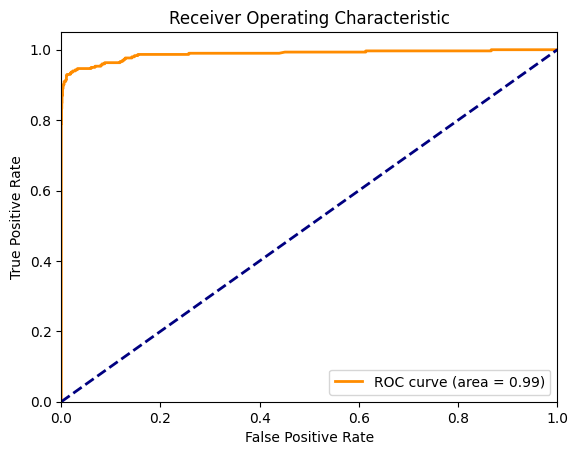

sigmoid
Accuracy: 0.9789143113503813
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1930
        spam       0.96      0.88      0.92       299

    accuracy                           0.98      2229
   macro avg       0.97      0.94      0.95      2229
weighted avg       0.98      0.98      0.98      2229



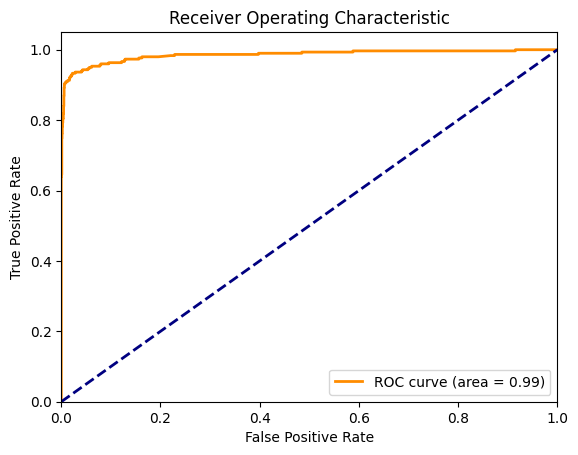

linear
Accuracy: 0.9825033647375505
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1930
        spam       0.97      0.89      0.93       299

    accuracy                           0.98      2229
   macro avg       0.98      0.94      0.96      2229
weighted avg       0.98      0.98      0.98      2229



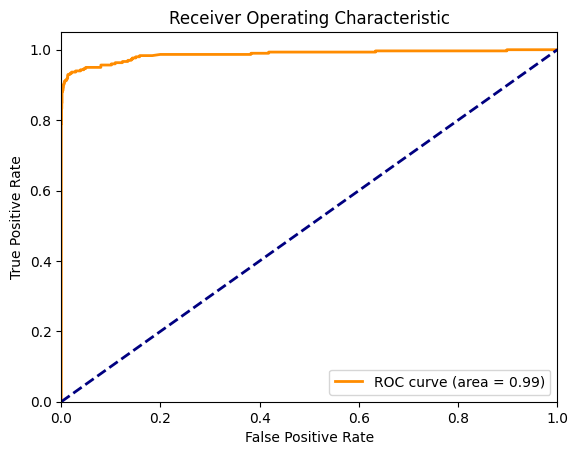

poly
Accuracy: 0.9380888290713324
Classification Report:
              precision    recall  f1-score   support

         ham       0.93      1.00      0.97      1930
        spam       1.00      0.54      0.70       299

    accuracy                           0.94      2229
   macro avg       0.97      0.77      0.83      2229
weighted avg       0.94      0.94      0.93      2229



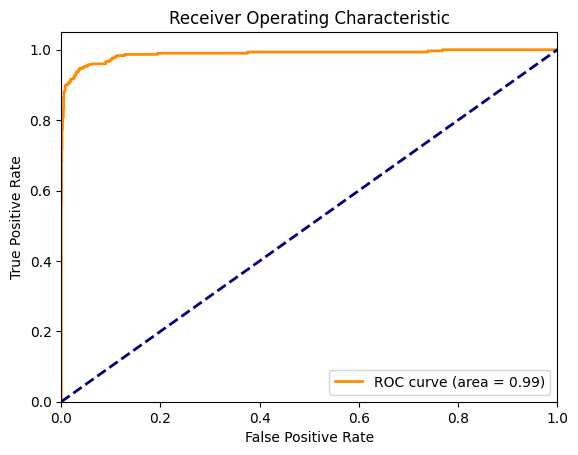

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from io import StringIO
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Step 2: Create the dataset
file_path = "SMSSpamCollection"
with open (file_path, 'r') as text:
    data = text.read()
df = pd.read_csv(StringIO(data), sep='\t', header=None, names=['label', 'message'])

# Step 3: Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 4: Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['message'] = df['message'].apply(preprocess_text)

# Step 5: Split the data
train_df, test_df = train_test_split(df, test_size=0.4, stratify=df['label'], random_state=42)

# Step 6: Transform text data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['message'])
X_test = vectorizer.transform(test_df['message'])
y_train = train_df['label']
y_test = test_df['label']
kernels = ["rbf", "sigmoid", "linear", "poly"]
# Step 7: Train the SVM model
for kernel_c in kernels:
    model = SVC(kernel=kernel_c, C=1.0, random_state=42)
    model.fit(X_train, y_train)

    # Step 8: Test the model
    y_pred = model.predict(X_test)

    # Step 9: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_output = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

    # Output results
    print(kernel_c)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report_output)

    # Step 8: Get predicted probabilities
    y_pred_prob = model.decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()